In [1]:
import pandas as pd
import numpy as np
from collections import Counter
data = pd.read_csv("kc_house_data.csv")

In [2]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


Data cleaning

In [3]:
date = data['date'] # Only consider year of sale date
for i in range(len(date)):
    year = date[i][0:4]
    data.iloc[i,1] = year

In [4]:
yr_renovated = data['yr_renovated'] # If there is a renovation, consider it as time of built
for i in range(len(yr_renovated)):
    if(yr_renovated[i] != 0):
        data.loc[i,'yr_built'] = yr_renovated[i]

In [5]:
data = data.dropna() # Drop all observations containing na

In [6]:
dummy_data = pd.get_dummies(data, columns = ['date','bedrooms','waterfront','view','condition','grade','zipcode']) # Dummy data

In [7]:
price = dummy_data['price'] # Price is target
newdata = dummy_data.drop(['id','yr_renovated','lat','long','price'],axis = 1) # id lat long is not relevant to our model
# Non normalized dataframe

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
d = min_max_scaler.fit_transform(newdata) #Normalized data matrix

C:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d, price, test_size=0.2, random_state=42)

Linear regression

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_test,y_test) 

-1.4150968018545946e+20

lasso regression

In [11]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [12]:
import warnings
warnings.filterwarnings("ignore")
score_list = []
x = []
for i in range(1,200):
    alpha = i/25
    x.append(alpha)
    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(X_train,y_train)
    score_list.append(clf.score(X_test,y_test))

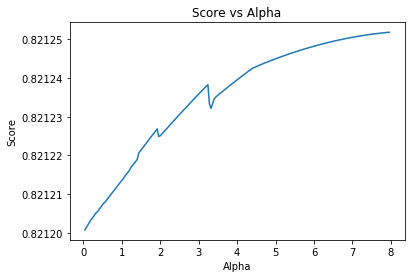

In [15]:
plt.plot(x,score_list)
plt.title('Score vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.show()

In [16]:
clf = linear_model.Lasso(alpha=0.1) #There is no big difference so we choose alpha=0.1 to reduce bias
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.82120176281296309

In [17]:
feature_importance = clf.coef_
a = np.argsort(feature_importance)[-20:]
newdata.columns[a]

Index(['sqft_above', 'zipcode_98107', 'zipcode_98033', 'zipcode_98122',
       'bathrooms', 'zipcode_98199', 'view_4', 'zipcode_98105', 'grade_11',
       'zipcode_98119', 'zipcode_98102', 'zipcode_98040', 'zipcode_98109',
       'sqft_lot', 'zipcode_98112', 'zipcode_98004', 'grade_12',
       'zipcode_98039', 'sqft_living', 'grade_13'],
      dtype='object')

In [18]:
Feature_5 = ['grade','sqft_living','zipcode','sqft_lot','view']
Importance_5 = [feature_importance[a[0]],feature_importance[a[1]],feature_importance[a[2]],feature_importance[a[6]],feature_importance[a[13]]]

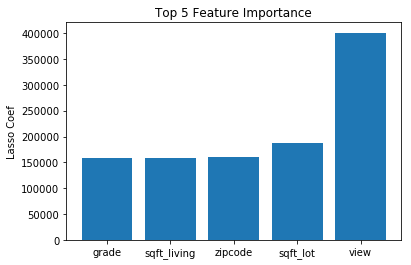

In [19]:
x = np.arange(5)
plt.bar(x, Importance_5)
plt.xticks(x, (Feature_5))
plt.title('Top 5 Feature Importance')
plt.ylabel('Lasso Coef')
plt.show()

Ridge

In [20]:
from sklearn.linear_model import Ridge

In [21]:
score_list = []
x = []
for i in range(1,100):
    alpha = i/25
    x.append(alpha)
    clf = Ridge(alpha=alpha)
    clf.fit(X_train,y_train)
    score_list.append(clf.score(X_test,y_test))

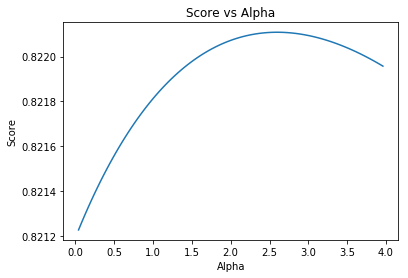

In [22]:
plt.plot(x,score_list)
plt.title('Score vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.show()

In [23]:
best_alpha = x[score_list.index(max(score_list))]
print(best_alpha)
clf = Ridge(alpha=best_alpha)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

2.6


0.8221088316932128

Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
score_list = []
x = []
for i in range(1,50):
    x.append(i)
    clf = DecisionTreeRegressor(max_depth=i)
    clf.fit(X_train,y_train)
    score_list.append(clf.score(X_test,y_test))

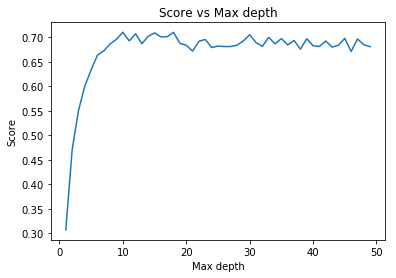

In [26]:
plt.plot(x,score_list)
plt.title('Score vs Max depth')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.show()

In [27]:
clf = DecisionTreeRegressor(max_depth=12)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.69959298556335991

KNN

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
score_list = []
x = []
for i in range(1,20):
    x.append(i)
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train,y_train)
    score_list.append(neigh.score(X_test,y_test))

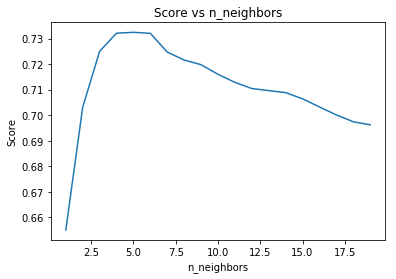

In [33]:
plt.plot(x,score_list)
plt.title('Score vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.show()

In [34]:
best_i = x[score_list.index(max(score_list))]
print(best_i)
neigh = KNeighborsRegressor(n_neighbors=best_i)
neigh.fit(X_train,y_train)
neigh.score(X_test,y_test)

5


0.73246137628722385

Conclusion: The best model is lasso regression or ridge regression with score above 0.8, so we decide to choose lasso regression with alpha = 0.1 for our final prediction

In [35]:
from flask import Flask,jsonify
import json
from flask_cors import CORS

In [36]:
from scipy.spatial import distance

In [95]:
def KNN(data, sqft, zipcode, year, bedroom, bathroom): #input sqft, zipcode, year, bedroom, bathroom to do prediction
    ob = pd.DataFrame(np.matrix([sqft, year, bedroom, bathroom]), columns=['sqft_living','yr_built','bedrooms','bathrooms'])
    df_zipcode = data[['sqft_living','zipcode','yr_built','bedrooms','bathrooms']] #filter by zipcode
    df_zipcode = df_zipcode[df_zipcode['zipcode'] == zipcode][['sqft_living','yr_built','bedrooms','bathrooms']]
    df_zipcode = df_zipcode.append(ob)
    df_norm = min_max_scaler.fit_transform(df_zipcode)
    dist = []
    observation = df_norm[len(df_norm)-1,:]
    for i in range(len(df_norm)-1):
        dist.append(distance.euclidean(df_norm[i,:],observation)) #find the observations with smallest distance
    index = np.argsort(dist)[:10]
    df_10 = df_zipcode.iloc[index,:]
    return df_10 #return index of dataframe

In [97]:
def predict(clf,data,newdata,sqft,zipcode, year, bedroom, bathroom): #data:original data #newdata:dummydata
    temp = KNN(data, sqft, zipcode, year, bedroom, bathroom)
    index = temp.index
    df = newdata[newdata.index.isin(index)]
    min_max_scaler.fit(newdata) #normalize 
    df_norm = min_max_scaler.transform(df)
    top_prediction = clf.predict(df_norm) #do predition
    return np.median(top_prediction) 

In [101]:
a

,sqft_living,yr_built,bedrooms,bathrooms
2098,1870,1926,3,2.00
8440,2190,1927,3,2.25
15270,2060,1940,2,1.75
18833,1640,1939,2,1.75
3863,1400,1924,3,2.00
15623,1430,1928,3,1.75
7521,1430,1934,2,1.50
3945,1740,1939,3,1.75
7335,1880,1941,3,1.75
2914,1720,1940,3,1.75


In [100]:
a = KNN(data,2000,98125,1920,2,2)
dict_3 = []
for i in range(len(a)):
    dict_3.append({})

In [91]:
clf = linear_model.Lasso(alpha=0.1) 
clf.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
app = Flask(__name__)
CORS(app)
@app.route('/project/status=<status>&sqft=<sqft>&zipcode=<zipcode>&year=<year>&bedroom=<bedroom>&bathroom=<bathroom>', methods=['GET'])
def server(status,sqft,zipcode,year,bedroom,bathroom): 
    status = int(status)
    sqft = float(sqft)
    zipcode = int(zipcode)
    year = int(year)
    bedroom = float(bedroom)
    bathroom = float(bathroom)
    if(status == 1): # st = 1 means we want to do a prediction
        price_pred = predict(clf,data,newdata,sqft,zipcode,year,bedroom,bathroom)
        return json.dumps(price_pred)
    if(status == 2): # return the dataset with columns of zipcode and price
        dict_2 = []
        for i in range(len(data)):
            dict_2.append({"zipcode":float(data.iloc[i,16]),"price":data.iloc[i,2]})
        return json.dumps(dict_2)
    if(status == 3):
        df_10 = KNN()
        return 1
    

In [93]:
if __name__ == '__main__':
    app.run() #The port will be 5000

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [27/Nov/2018 02:12:28] "GET /project/status=1&sqft=2000&zipcode=98125&year=1920&bedroom=2&bathroom=2 HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2018 02:13:07] "GET /project/status=2&sqft=2000&zipcode=98125&year=1920&bedroom=2&bathroom=2 HTTP/1.1" 200 -


----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 53931)
